### Przypomnienie wstępne metody gradientowej i metody sprzęzonych gradientów.



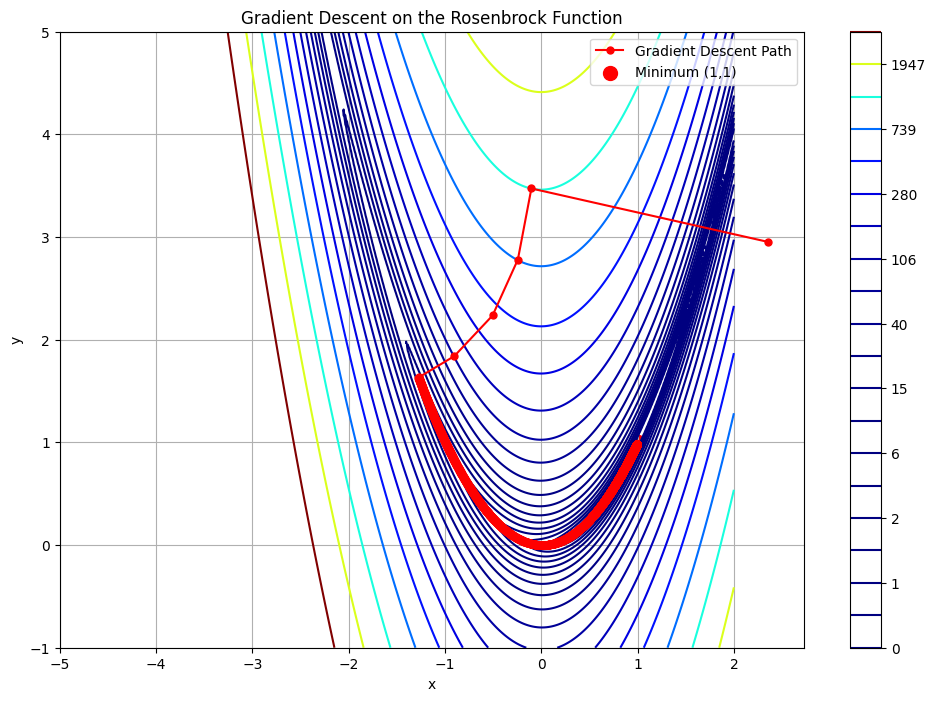

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Rosenbrock function
def rosenbrock(x, y, a=1, b=100):
    return (a - x) ** 2 + b * (y - x**2) ** 2

# Partial derivatives of the Rosenbrock function
def rosenbrock_grad(x, y, a=1, b=100):
    df_dx = -2 * (a - x) - 4 * b * x * (y - x**2)
    df_dy = 2 * b * (y - x**2)
    return np.array([df_dx, df_dy])

# Gradient Descent Function for 2D
def gradient_descent_2d(starting_point, learning_rate, num_iterations):
    point = np.array(starting_point, dtype=np.float64)
    history = []

    for _ in range(num_iterations):
        grad = rosenbrock_grad(point[0], point[1])
        point -= learning_rate * grad
        history.append(point.copy())

    return point, np.array(history)

# Parameters
starting_point = [-2.6, 2]  # A challenging starting point
learning_rate = 0.001
num_iterations = 10000

# Run Gradient Descent
min_point, history = gradient_descent_2d(starting_point, learning_rate, num_iterations)

# Plotting the results
x = np.linspace(-5, 2, 400)
y = np.linspace(-1, 5, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

plt.figure(figsize=(12, 8))
cp = plt.contour(X, Y, Z, levels=np.logspace(-0.5, 3.5, 20, base=10), cmap='jet')
plt.colorbar(cp)
plt.plot(history[:, 0], history[:, 1], marker='o', color='red', markersize=5, linestyle='-', label='Gradient Descent Path')
plt.title('Gradient Descent on the Rosenbrock Function')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(1, 1, c='red', s=100, label='Minimum (1,1)')
plt.legend()
plt.grid(True)
plt.show()

### Fletcher-Reeves beta approximation

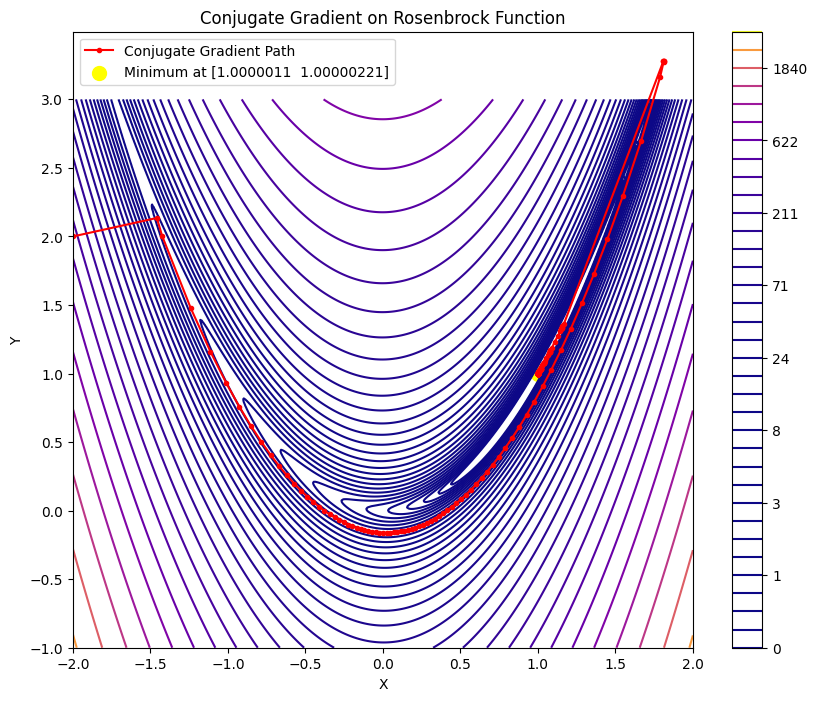

In [25]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the Rosenbrock function
def rosenbrock(x, a=1, b=100):
    return (a - x[0]) ** 2 + b * (x[1] - x[0] ** 2) ** 2

# Gradient of the Rosenbrock function
def rosenbrock_grad(x, a=1, b=100):
    df_dx = -2 * (a - x[0]) - 4 * b * x[0] * (x[1] - x[0]**2)
    df_dy = 2 * b * (x[1] - x[0]**2)
    return np.array([df_dx, df_dy])

# Conjugate Gradient Algorithm with line search for the Rosenbrock function
def conjugate_gradient_rosenbrock(initial_point, a=1, b=100, tolerance=1e-6, max_iterations=1000):
    x = np.array(initial_point, dtype=float)
    r = -rosenbrock_grad(x, a, b)
    p = r.copy()
    history = [x.copy()]
    
    for i in range(max_iterations):
        def obj_func(alpha):
            return rosenbrock(x + alpha * p, a, b)
        
        res = minimize(obj_func, 0.001, bounds=[(None, None)])
        alpha = res.x
        
        x += alpha * p
        history.append(x.copy())
        r_new = -rosenbrock_grad(x, a, b)
        
        if np.linalg.norm(r_new) < tolerance:
            break
        
        beta =  np.dot(r_new, r_new / np.dot(r, r))
        p = r_new + beta * p
        r = r_new
        
    return x, np.array(history)

# Initial guess
initial_point = [-2, 2]

# Run the optimization
solution, history = conjugate_gradient_rosenbrock(initial_point)

# Plotting the results
x_range = np.linspace(-2, 2, 400)
y_range = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = rosenbrock(np.array([X, Y]))

plt.figure(figsize=(10, 8))
cp = plt.contour(X, Y, Z, levels=np.logspace(-0.5, 3.5, 35, base=10), cmap='plasma')
plt.colorbar(cp)
plt.plot(history[:, 0], history[:, 1], 'r.-', label='Conjugate Gradient Path')
plt.scatter(solution[0], solution[1], color='yellow', s=100, label=f'Minimum at {solution}')
plt.title('Conjugate Gradient on Rosenbrock Function')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### Polak-Ribière beta approximation

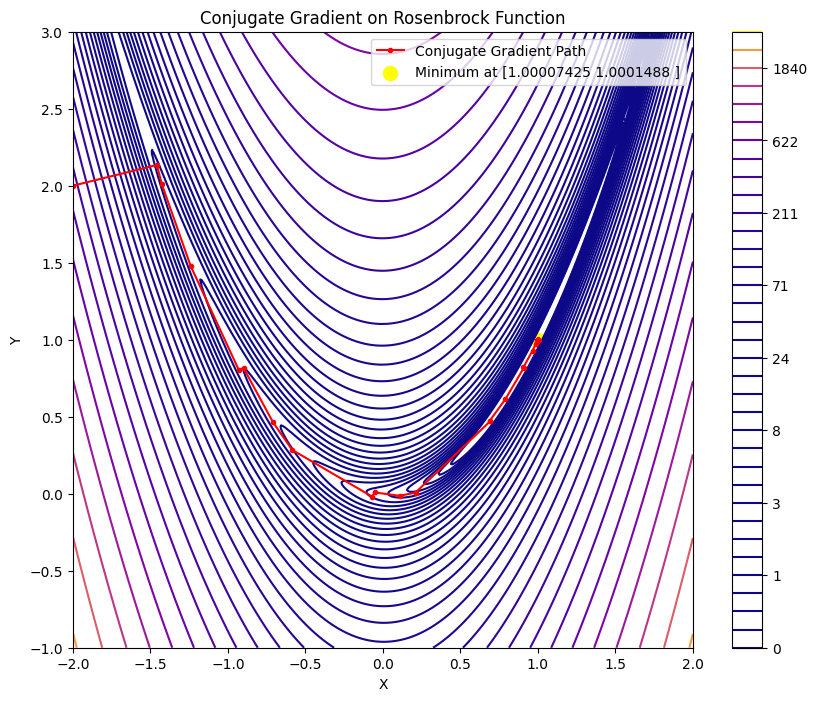

In [26]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the Rosenbrock function
def rosenbrock(x, a=1, b=100):
    return (a - x[0]) ** 2 + b * (x[1] - x[0] ** 2) ** 2

# Gradient of the Rosenbrock function
def rosenbrock_grad(x, a=1, b=100):
    df_dx = -2 * (a - x[0]) - 4 * b * x[0] * (x[1] - x[0]**2)
    df_dy = 2 * b * (x[1] - x[0]**2)
    return np.array([df_dx, df_dy])

# Conjugate Gradient Algorithm with line search for the Rosenbrock function
def conjugate_gradient_rosenbrock(initial_point, a=1, b=100, tolerance=1e-6, max_iterations=1000):
    x = np.array(initial_point, dtype=float)
    r = -rosenbrock_grad(x, a, b)
    p = r.copy()
    history = [x.copy()]
    
    for i in range(max_iterations):
        def obj_func(alpha):
            return rosenbrock(x + alpha * p, a, b)
        
        res = minimize(obj_func, 0.001, bounds=[(None, None)])
        alpha = res.x
        
        x += alpha * p
        history.append(x.copy())
        r_new = -rosenbrock_grad(x, a, b)
        
        if np.linalg.norm(r_new) < tolerance:
            break
        
        beta = max(0, np.dot(r_new, (r_new - r)) / np.dot(r, r))
        p = r_new + beta * p
        r = r_new
        
    return x, np.array(history)

# Initial guess
initial_point = [-2, 2]

# Run the optimization
solution, history = conjugate_gradient_rosenbrock(initial_point)

# Plotting the results
x_range = np.linspace(-2, 2, 400)
y_range = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = rosenbrock(np.array([X, Y]))

plt.figure(figsize=(10, 8))
cp = plt.contour(X, Y, Z, levels=np.logspace(-0.5, 3.5, 35, base=10), cmap='plasma')
plt.colorbar(cp)
plt.plot(history[:, 0], history[:, 1], 'r.-', label='Conjugate Gradient Path')
plt.scatter(solution[0], solution[1], color='yellow', s=100, label=f'Minimum at {solution}')
plt.title('Conjugate Gradient on Rosenbrock Function')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### Momentum vs lokalne minima

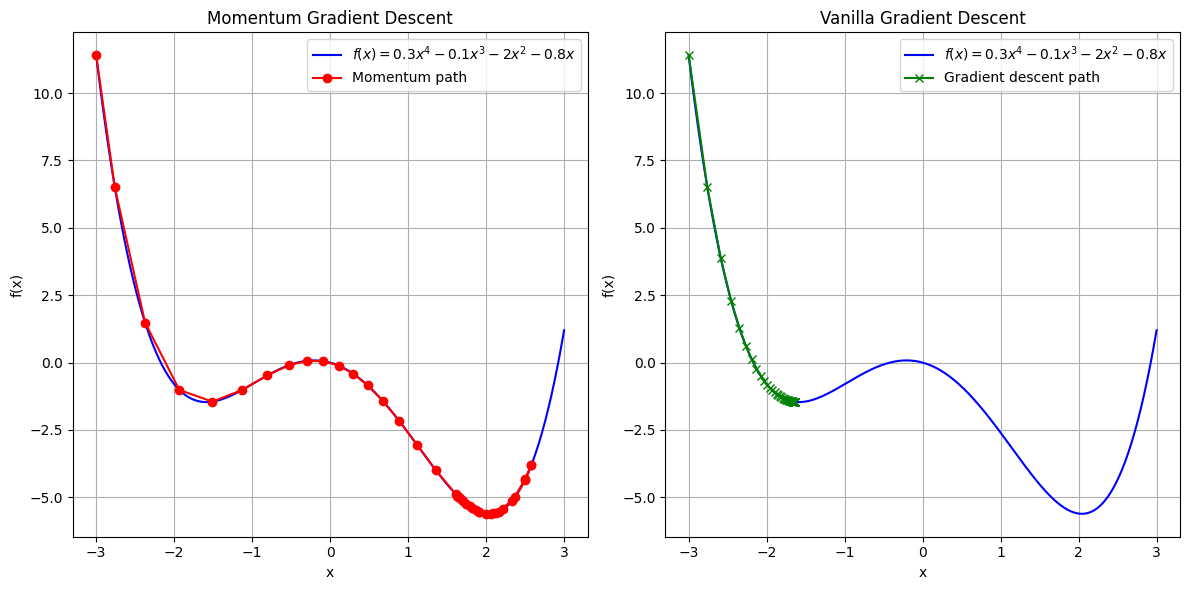

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

# Define function and symbolic derivative
f = lambda x: 0.3 * x**4 - 0.1 * x**3 - 2* x**2 -0.8 * x
x_sym = sym.Symbol('x')
f_prime_sym = sym.diff(f(x_sym))
f_prime = sym.lambdify(x_sym, f_prime_sym)


# Parameters
x_0 = -3
alpha = 0.01
beta = 0.9
iterations = 40

# Initialize list 
x_values_momentum = [x_0]
x_values = [x_0]
x_norm = x_0
x_momentum = x_0
v_momentum = 0  # velocity for standard moomentum

# Momentum gradient descent
for i in range(iterations):
    grad_momentum = f_prime(x_momentum)
    v_momentum = beta * v_momentum - alpha * grad_momentum
    x_momentum = x_momentum + v_momentum
    x_values_momentum.append(x_momentum)

    # gradient descent 
    grad = f_prime(x_norm)
    x_norm = x_norm - alpha * grad
    x_values.append(x_norm)



# Plotting for separate graphs
x_plot = np.linspace(-3, 3, 300)
y_plot = f(x_plot)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Momentum
ax1.plot(x_plot, y_plot, label=r'$f(x) = 0.3x^4-0.1x^3-2x^2-0.8x$', color='blue')
ax1.plot(x_values_momentum, [f(x_i) for x_i in x_values_momentum], color='red', marker='o', label='Momentum path')
ax1.set_title('Momentum Gradient Descent')
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.legend()
ax1.grid(True)

# Plot for gradient descent 
ax2.plot(x_plot, y_plot, label=r'$f(x) = 0.3x^4-0.1x^3-2x^2-0.8x$', color='blue')
ax2.plot(x_values, [f(x_i) for x_i in x_values], color='green', marker='x', label='Gradient descent path')
ax2.set_title('Vanilla Gradient Descent')
ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()




### Momentum vs. Metoda gradientu prostego dla 100 kroków na funkcji Rosenbrocka

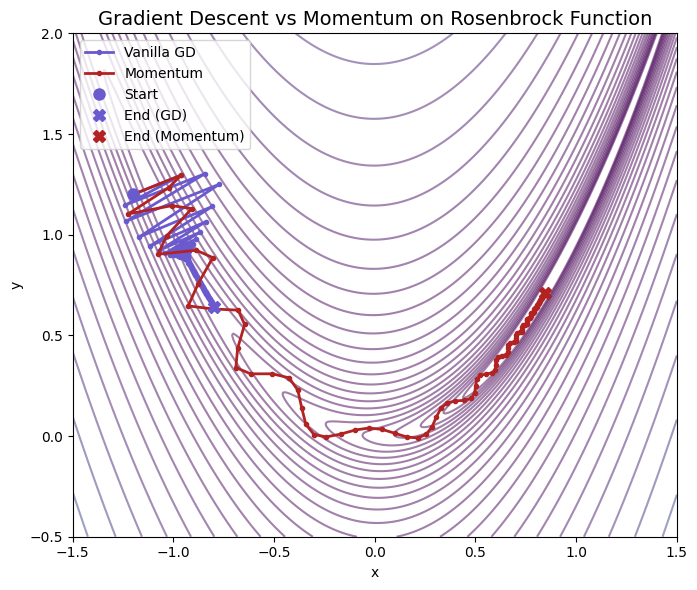

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Rosenbrock and gradient
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def grad_rosenbrock(x, y):
    return np.array([
        -2 * (1 - x) - 400 * x * (y - x**2),
        200 * (y - x**2)
    ])

# Vanilla GD
def gradient_descent(lr=0.002, steps=100):
    x = np.array([-1.2, 1.2])
    path = [x.copy()]
    for _ in range(steps):
        x -= lr * grad_rosenbrock(*x)
        path.append(x.copy())
    return np.array(path)

# GD with Momentum
def gradient_descent_momentum(lr=0.002, momentum=0.9, steps=100):
    x = np.array([-1.2, 1.2])
    v = np.zeros_like(x)
    path = [x.copy()]
    for _ in range(steps):
        v = momentum * v - lr * grad_rosenbrock(*x)
        x += v
        path.append(x.copy())
    return np.array(path)

# Compute paths
gd_path = gradient_descent()
momentum_path = gradient_descent_momentum()

# Plot settings
x = np.linspace(-1.5, 1.5, 400)
y = np.linspace(-0.5, 2, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, levels=np.logspace(-0.5, 3.5, 30), cmap='viridis', alpha=0.5)

# Plot GD path
plt.plot(gd_path[:, 0], gd_path[:, 1], 'o-', color='slateblue', linewidth=2, markersize=3, label='Vanilla GD')

# Plot Momentum path
plt.plot(momentum_path[:, 0], momentum_path[:, 1], 'o-', color='firebrick', linewidth=2, markersize=3, label='Momentum')

# Start and end
plt.plot(*gd_path[0],'o', color='slateblue', markersize=8, label='Start')
plt.plot(*gd_path[-1], 'X', color='slateblue', markersize=8, label='End (GD)')
plt.plot(*momentum_path[-1], 'X', color='firebrick', markersize=8, label='End (Momentum)')

# Styling
plt.title('Gradient Descent vs Momentum on Rosenbrock Function', fontsize=14)
plt.xlabel('x'); plt.ylabel('y')
plt.legend(loc='upper left')
plt.xlim(-1.5, 1.5)
plt.ylim(-0.5, 2)
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()


### Momentum vs. Metoda gradientu prostego dla 1000 kroków

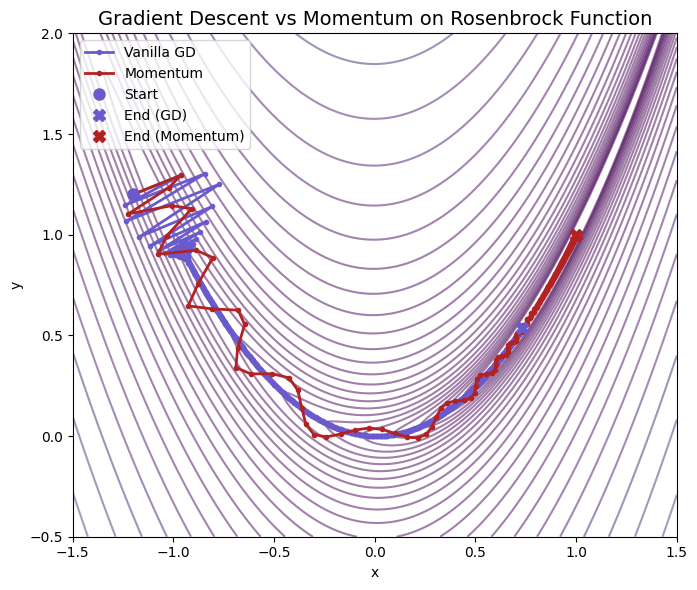

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Rosenbrock and gradient
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def grad_rosenbrock(x, y):
    return np.array([
        -2 * (1 - x) - 400 * x * (y - x**2),
        200 * (y - x**2)
    ])

# Vanilla GD
def gradient_descent(lr=0.002, steps=1000):
    x = np.array([-1.2, 1.2])
    path = [x.copy()]
    for _ in range(steps):
        x -= lr * grad_rosenbrock(*x)
        path.append(x.copy())
    return np.array(path)

# GD with Momentum
def gradient_descent_momentum(lr=0.002, momentum=0.9, steps=1000):
    x = np.array([-1.2, 1.2])
    v = np.zeros_like(x)
    path = [x.copy()]
    for _ in range(steps):
        v = momentum * v - lr * grad_rosenbrock(*x)
        x += v
        path.append(x.copy())
    return np.array(path)

# Compute paths
gd_path = gradient_descent()
momentum_path = gradient_descent_momentum()

# Plot settings
x = np.linspace(-1.5, 1.5, 400)
y = np.linspace(-0.5, 2, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, levels=np.logspace(-0.5, 3.5, 30), cmap='viridis', alpha=0.5)

# Plot GD path
plt.plot(gd_path[:, 0], gd_path[:, 1], 'o-', color='slateblue', linewidth=2, markersize=3, label='Vanilla GD')

# Plot Momentum path
plt.plot(momentum_path[:, 0], momentum_path[:, 1], 'o-', color='firebrick', linewidth=2, markersize=3, label='Momentum')

# Start and end
plt.plot(*gd_path[0],'o', color='slateblue', markersize=8, label='Start')
plt.plot(*gd_path[-1], 'X', color='slateblue', markersize=8, label='End (GD)')
plt.plot(*momentum_path[-1], 'X', color='firebrick', markersize=8, label='End (Momentum)')

# Styling
plt.title('Gradient Descent vs Momentum on Rosenbrock Function', fontsize=14)
plt.xlabel('x'); plt.ylabel('y')
plt.legend(loc='upper left')
plt.xlim(-1.5, 1.5)
plt.ylim(-0.5, 2)
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()


### Momentum vs. Metoda najszybszego spadku dla 100 kroków

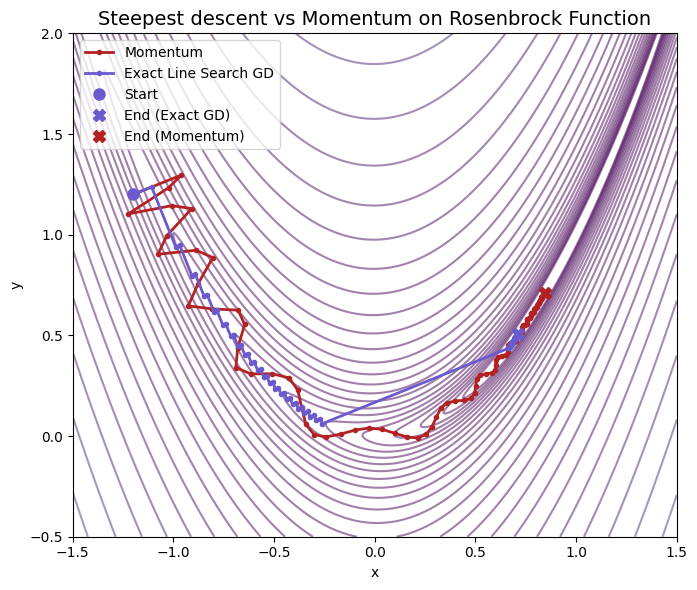

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Rosenbrock function and its gradient
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def grad_rosenbrock(x, y):
    return np.array([
        -2 * (1 - x) - 400 * x * (y - x**2),
        200 * (y - x**2)
    ])

# Exact line search using steepest descent
def gradient_descent_exact_linesearch(steps=100):
    x = np.array([-1.2, 1.2], dtype=float)
    path = [x.copy()]
    for _ in range(steps):
        grad = grad_rosenbrock(*x)
        if np.linalg.norm(grad) < 1e-8:
            break
        d = -grad / np.linalg.norm(grad)

        # Exact line search using minimize_scalar from scipy
        def phi(alpha):
            new_x = x + alpha * d
            return rosenbrock(*new_x)

        res = minimize_scalar(phi, bounds=(0, 1), method='bounded')
        alpha = res.x

        x = x + alpha * d
        path.append(x.copy())
    return np.array(path)

# GD with Momentum (unchanged)
def gradient_descent_momentum(lr=0.002, momentum=0.9, steps=100):
    x = np.array([-1.2, 1.2])
    v = np.zeros_like(x)
    path = [x.copy()]
    for _ in range(steps):
        v = momentum * v - lr * grad_rosenbrock(*x)
        x += v
        path.append(x.copy())
    return np.array(path)

# Compute paths
exact_line_path = gradient_descent_exact_linesearch()
momentum_path = gradient_descent_momentum()

# Plot settings
x = np.linspace(-1.5, 1.5, 400)
y = np.linspace(-0.5, 2, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, levels=np.logspace(-0.5, 3.5, 30), cmap='viridis', alpha=0.5)

# Plot Momentum path
plt.plot(momentum_path[:, 0], momentum_path[:, 1], 'o-', color='firebrick', linewidth=2, markersize=3, label='Momentum')


# Plot Exact Line Search GD path
plt.plot(exact_line_path[:, 0], exact_line_path[:, 1], 'o-', color='slateblue', linewidth=2, markersize=3, label='Exact Line Search GD')
# Start and end

plt.plot(*exact_line_path[0],'o', color='slateblue', markersize=8, label='Start')
plt.plot(*exact_line_path[-1], 'X', color='slateblue', markersize=8, label='End (Exact GD)')
plt.plot(*momentum_path[-1], 'X', color='firebrick', markersize=8, label='End (Momentum)')

# Styling
plt.title('Steepest descent vs Momentum on Rosenbrock Function', fontsize=14)
plt.xlabel('x'); plt.ylabel('y')
plt.legend(loc='upper left')
plt.xlim(-1.5, 1.5)
plt.ylim(-0.5, 2)
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()


### Momentum vs Neserov Momentum dla 50 kroków

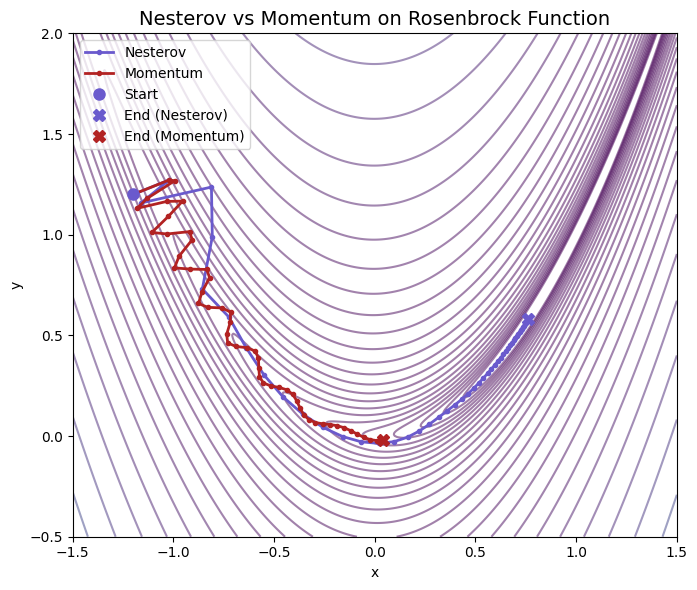

In [31]:
import numpy as np
import matplotlib.pyplot as plt

start = [-1.2, 1.2]
# Rosenbrock function and its gradient
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def grad_rosenbrock(x, y):
    return np.array([
        -2 * (1 - x) - 400 * x * (y - x**2),
        200 * (y - x**2)
    ])

# Gradient Descent with Nesterov Momentum
def gradient_descent_nesterov(lr=0.0015, momentum=0.9, steps=50):
    x = np.array(start)
    v = np.zeros_like(x)
    path = [x.copy()]
    for _ in range(steps):
        lookahead = x + momentum * v
        grad = grad_rosenbrock(*lookahead)
        v = momentum * v - lr * grad
        x += v
        path.append(x.copy())
    return np.array(path)

# Gradient Descent with Classical Momentum
def gradient_descent_momentum(lr=0.0015, momentum=0.9, steps=50):
    x = np.array(start)
    v = np.zeros_like(x)
    path = [x.copy()]
    for _ in range(steps):
        v = momentum * v - lr * grad_rosenbrock(*x)
        x += v
        path.append(x.copy())
    return np.array(path)

# Compute optimization paths
nesterov_path = gradient_descent_nesterov()
momentum_path = gradient_descent_momentum()

# Generate grid for contour plot
x = np.linspace(-1.5, 1.5, 400)
y = np.linspace(-0.5, 2, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

# Plotting
plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, levels=np.logspace(-0.5, 3.5, 30), cmap='viridis', alpha=0.5)

# Plot Nesterov path
plt.plot(nesterov_path[:, 0], nesterov_path[:, 1], 'o-', color='slateblue', linewidth=2, markersize=3, label='Nesterov')

# Plot Classical Momentum path
plt.plot(momentum_path[:, 0], momentum_path[:, 1], 'o-', color='firebrick', linewidth=2, markersize=3, label='Momentum')

# Start and end points
plt.plot(*nesterov_path[0],'o', color='slateblue', markersize=8, label='Start')
plt.plot(*nesterov_path[-1], 'X', color='slateblue', markersize=8, label='End (Nesterov)')
plt.plot(*momentum_path[-1], 'X', color='firebrick', markersize=8, label='End (Momentum)')

# Styling
plt.title('Nesterov vs Momentum on Rosenbrock Function', fontsize=14)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.xlim(-1.5, 1.5)
plt.ylim(-0.5, 2)
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()


### Momentum vs Nesterov dla funkcji kwadratowej, 'skakanie'

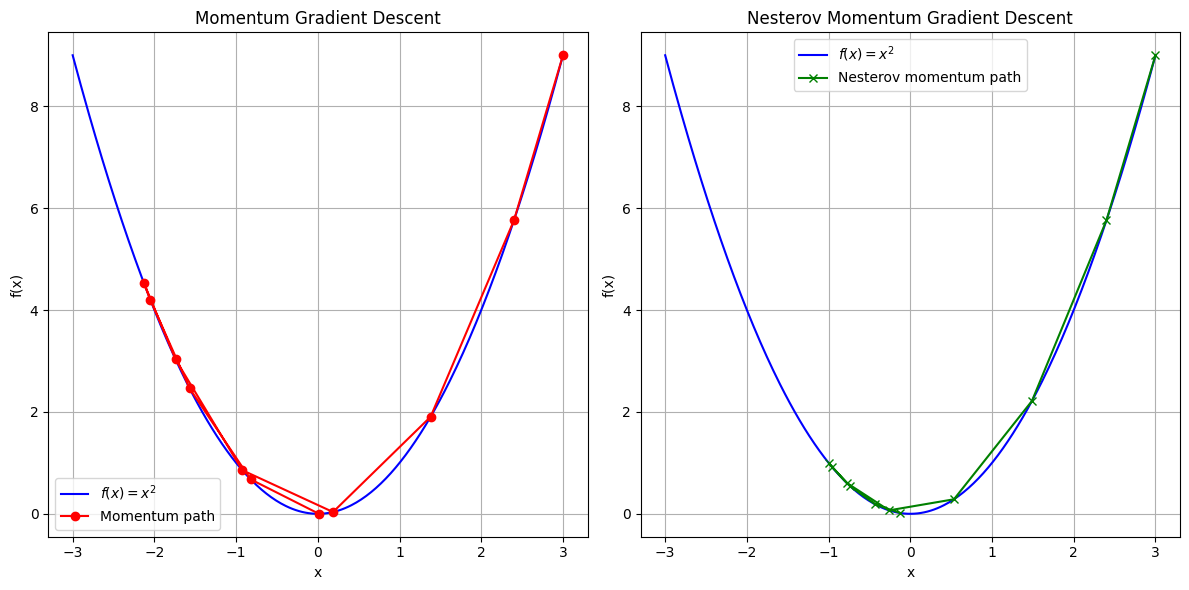

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

# Define function and symbolic derivative
f = lambda x: x**2
x_sym = sym.Symbol('x')
f_prime_sym = sym.diff(f(x_sym))
f_prime = sym.lambdify(x_sym, f_prime_sym)

# Parameters
x_0 = 3
alpha = 0.1
beta = 0.9
iterations = 10

# Initialize lists for regular momentum and Nesterov momentum
x_values_momentum = [x_0]
x_values_nesterov = [x_0]
x_momentum = x_0
x_nesterov = x_0
v_momentum = 0  # initialize velocity for standard momentum
v_nesterov = 0  # initialize velocity for Nesterov momentum

# Momentum gradient descent (standard)
for i in range(iterations):
    grad_momentum = f_prime(x_momentum)
    v_momentum = beta * v_momentum - alpha * grad_momentum
    x_momentum = x_momentum + v_momentum
    x_values_momentum.append(x_momentum)

    # Nesterov momentum gradient descent
    grad_nesterov = f_prime(x_nesterov + beta * v_nesterov)  # Look ahead
    v_nesterov = beta * v_nesterov - alpha * grad_nesterov
    x_nesterov = x_nesterov + v_nesterov
    x_values_nesterov.append(x_nesterov)

# Plotting for separate graphs
x_plot = np.linspace(-3, 3, 300)
y_plot = f(x_plot)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Momentum
ax1.plot(x_plot, y_plot, label=r'$f(x) = x^2$', color='blue')
ax1.plot(x_values_momentum, [f(x_i) for x_i in x_values_momentum], color='red', marker='o', label='Momentum path')
ax1.set_title('Momentum Gradient Descent')
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.legend()
ax1.grid(True)

# Plot for Nesterov Momentum
ax2.plot(x_plot, y_plot, label=r'$f(x) = x^2$', color='blue')
ax2.plot(x_values_nesterov, [f(x_i) for x_i in x_values_nesterov], color='green', marker='x', label='Nesterov momentum path')
ax2.set_title('Nesterov Momentum Gradient Descent')
ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


### Adagrad

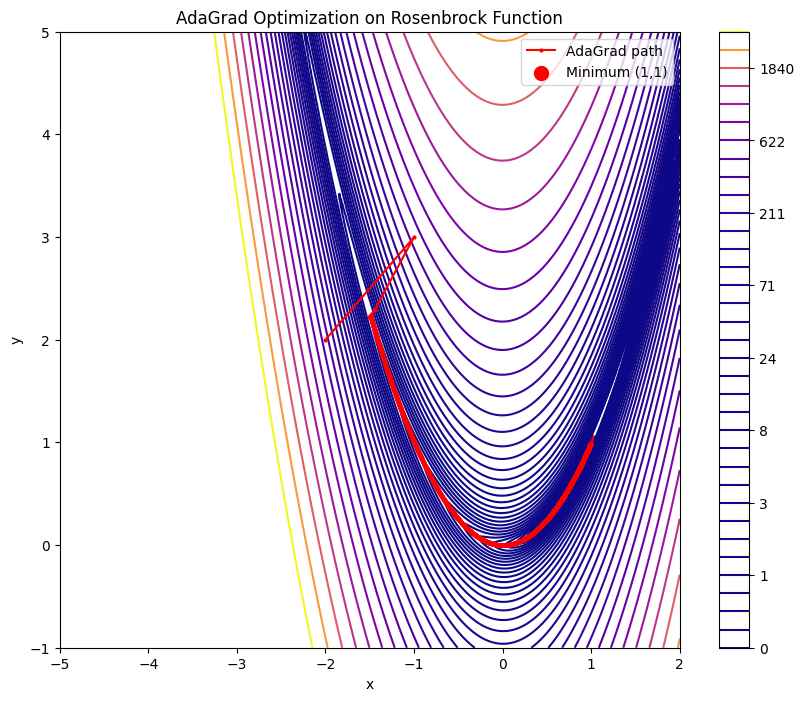

In [33]:
import numpy as np
import matplotlib.pyplot as plt
# Define the Rosenbrock function
def rosenbrock(x, y, a=1, b=100):
    return (a - x)**2 + b * (y - x**2)**2
# Define the gradient of the Rosenbrock function
def rosenbrock_grad(x, y, a=1, b=100):
    df_dx = -2 * (a - x) - 4 * b * x * (y - x**2)
    df_dy = 2 * b * (y - x**2)
    return np.array([df_dx, df_dy])
# Implement AdaGrad algorithm
def adagrad(f, grad_f, init, lr=0.1, max_iter=1000, epsilon=1e-8):
    x = np.array(init, dtype=float)
    history = [x.copy()]
    gradient_accumulate = np.zeros_like(x)
    for i in range(max_iter):
        grad = grad_f(x[0], x[1])
        gradient_accumulate += grad**2
        adjusted_lr = lr / (np.sqrt(gradient_accumulate) + epsilon)
        x -= adjusted_lr * grad
        history.append(x.copy())
    return np.array(history)
# Initial parameters
initial_position = [-2, 2]
learning_rate = 1.0
iterations = 10000
# Run AdaGrad
trajectory = adagrad(rosenbrock, rosenbrock_grad, initial_position, lr=learning_rate, max_iter=iterations)
# Plotting the results
x_range = np.linspace(-5, 2, 400)
y_range = np.linspace(-1, 5, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = rosenbrock(X, Y)
plt.figure(figsize=(10, 8))
cp = plt.contour(X, Y, Z, levels=np.logspace(-0.5, 3.5, 35, base=10), cmap='plasma')
plt.colorbar(cp)
plt.plot(trajectory[:, 0], trajectory[:, 1], color='red', marker='o', markersize=2, label='AdaGrad path')
plt.scatter(1, 1, c='red', s=100, label='Minimum (1,1)')
plt.title('AdaGrad Optimization on Rosenbrock Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Adagrad vs RMSProp himmelblau function

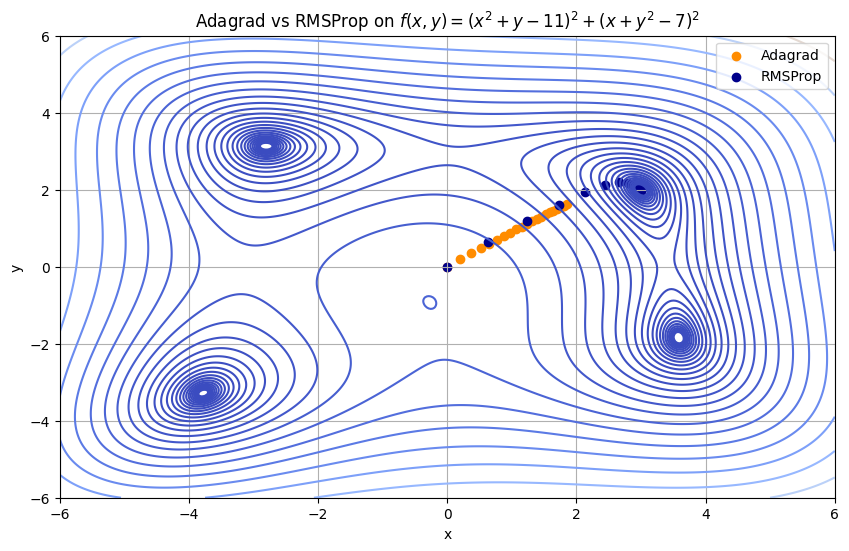

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

# --- Define function and gradient ---
x, y = sym.symbols('x y')
g = (x**2 + y - 11)**2 + (x + y**2 - 7)**2
grad_sym = [sym.diff(g, var) for var in (x, y)]
grad_fn = sym.lambdify((x, y), grad_sym)

# --- Settings ---
alpha = 0.2
eps = 1e-8
n_steps = 20
start_point = np.array([0.0, 0.0])

# --- Adagrad ---
adagrad_vals = [start_point.copy()]
adagrad_accum = np.zeros(2)

point = start_point.copy()
for _ in range(n_steps):
    grad = np.array(grad_fn(*point))
    adagrad_accum += grad**2
    adj_grad = alpha * grad / (np.sqrt(adagrad_accum) + eps)
    point -= adj_grad
    adagrad_vals.append(point.copy())

# --- RMSProp ---
rmsprop_vals = [start_point.copy()]
rmsprop_accum = np.zeros(2)
decay_rate = 0.9
point = start_point.copy()

for _ in range(n_steps):
    grad = np.array(grad_fn(*point))
    rmsprop_accum = decay_rate * rmsprop_accum + (1 - decay_rate) * grad**2
    adj_grad = alpha * grad / (np.sqrt(rmsprop_accum) + eps)
    point -= adj_grad
    rmsprop_vals.append(point.copy())

# --- Prepare contour plot ---
x_range = np.linspace(-6, 6, 400)
y_range = np.linspace(-6, 6, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = (X**2 + Y - 11)**2 + (X + Y**2 - 7)**2

# --- Plot ---
plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, levels=np.logspace(-0.5, 3.5, 30), cmap="coolwarm")

# Plot Adagrad
ada_xs, ada_ys = zip(*adagrad_vals)
plt.scatter(ada_xs, ada_ys, marker='o', color='darkorange', label='Adagrad')

# Plot RMSProp
rms_xs, rms_ys = zip(*rmsprop_vals)
plt.scatter(rms_xs, rms_ys, marker='o', color='darkblue', label='RMSProp')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Adagrad vs RMSProp on $f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2$")
plt.legend()
plt.grid(True)
plt.show()


### Adagrad vs RMSProp Rosenbrock function

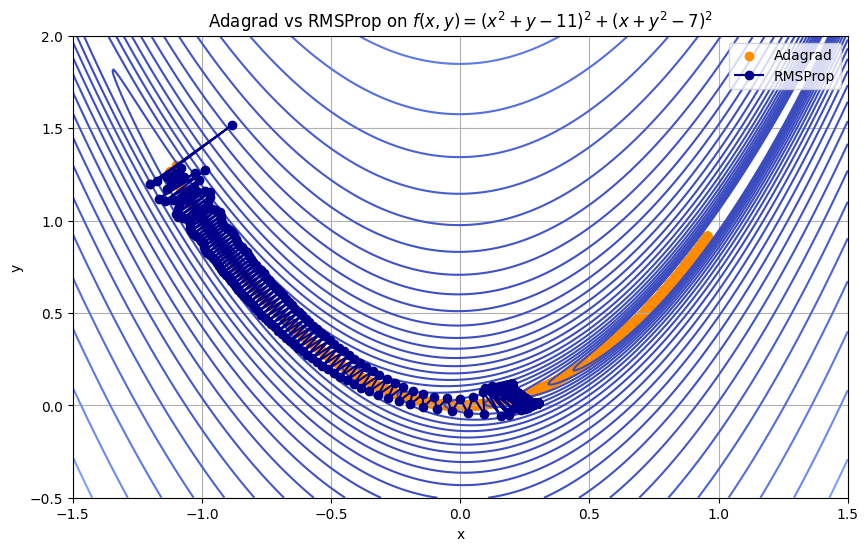

In [35]:


import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

# --- Define function and gradient ---
x, y = sym.symbols('x y')
g = (1 - x)**2 + 100 * (y - x**2)**2
grad_sym = [sym.diff(g, var) for var in (x, y)]
grad_fn = sym.lambdify((x, y), grad_sym)

# --- Settings ---
alpha = 0.1
eps = 1e-8
n_steps = 5000
start_point = np.array([-1.2,1.2])

# --- Adagrad ---
adagrad_vals = [start_point.copy()]
adagrad_accum = np.zeros(2)

point = start_point.copy()
for _ in range(n_steps):
    grad = np.array(grad_fn(*point))
    adagrad_accum += grad**2
    adj_grad = alpha * grad / (np.sqrt(adagrad_accum) + eps)
    point -= adj_grad
    adagrad_vals.append(point.copy())

# --- RMSProp ---
rmsprop_vals = [start_point.copy()]
rmsprop_accum = np.zeros(2)
decay_rate = 0.9
point = start_point.copy()

for _ in range(n_steps):
    grad = np.array(grad_fn(*point))
    rmsprop_accum = decay_rate * rmsprop_accum + (1 - decay_rate) * grad**2
    adj_grad = alpha * grad / (np.sqrt(rmsprop_accum) + eps)
    point -= adj_grad
    rmsprop_vals.append(point.copy())

# --- Prepare contour plot ---
x_range = np.linspace(-1.5, 1.5, 400)
y_range = np.linspace(-0.5, 2, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = (1 - X)**2 + 100 * (Y - X**2)**2

# --- Plot ---
plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, levels=np.logspace(-0.5, 3.5, 30), cmap="coolwarm")

# Plot Adagrad
ada_xs, ada_ys = zip(*adagrad_vals)
plt.scatter(ada_xs, ada_ys, marker='o', color='darkorange', label='Adagrad')

# Plot RMSProp
rms_xs, rms_ys = zip(*rmsprop_vals)
plt.plot(rms_xs, rms_ys, marker='o', color='darkblue', label='RMSProp')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Adagrad vs RMSProp on $f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2$")
plt.legend()
plt.grid(True)
plt.show()


### Adadelta

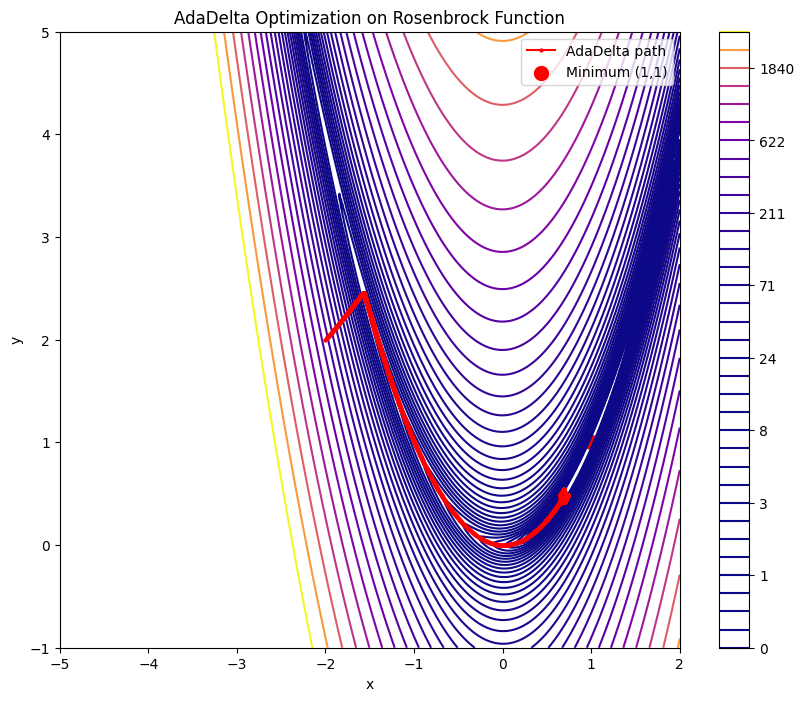

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Rosenbrock function
def rosenbrock(x, y, a=1, b=100):
    return (a - x)**2 + b * (y - x**2)**2

# Define the gradient of the Rosenbrock function
def rosenbrock_grad(x, y, a=1, b=100):
    df_dx = -2 * (a - x) - 4 * b * x * (y - x**2)
    df_dy = 2 * b * (y - x**2)
    return np.array([df_dx, df_dy])

# Implement AdaDelta algorithm
def adadelta(f, grad_f, init, rho=0.95, max_iter=1000, epsilon=1e-6):
    x = np.array(init, dtype=float)
    history = [x.copy()]
    accum_grad = np.zeros_like(x)
    accum_update = np.zeros_like(x)
    
    for i in range(max_iter):
        grad = grad_f(x[0], x[1])
        accum_grad = rho * accum_grad + (1 - rho) * grad**2
        update = (np.sqrt(accum_update + epsilon) / np.sqrt(accum_grad + epsilon)) * grad
        accum_update = rho * accum_update + (1 - rho) * update**2
        x -= update
        history.append(x.copy())
    
    return np.array(history)

# Initial parameters
initial_position = [-2, 2]
iterations = 10000

# Run AdaDelta
trajectory = adadelta(rosenbrock, rosenbrock_grad, initial_position, max_iter=iterations)

# Plotting the results
x_range = np.linspace(-5, 2, 400)
y_range = np.linspace(-1, 5, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = rosenbrock(X, Y)
plt.figure(figsize=(10, 8))
cp = plt.contour(X, Y, Z, levels=np.logspace(-0.5, 3.5, 35, base=10), cmap='plasma')
plt.colorbar(cp)
plt.plot(trajectory[:, 0], trajectory[:, 1], color='red', marker='o', markersize=2, label='AdaDelta path')
plt.scatter(1, 1, c='red', s=100, label='Minimum (1,1)')
plt.title('AdaDelta Optimization on Rosenbrock Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


### Adam vs RMSProp vs. Momentum 

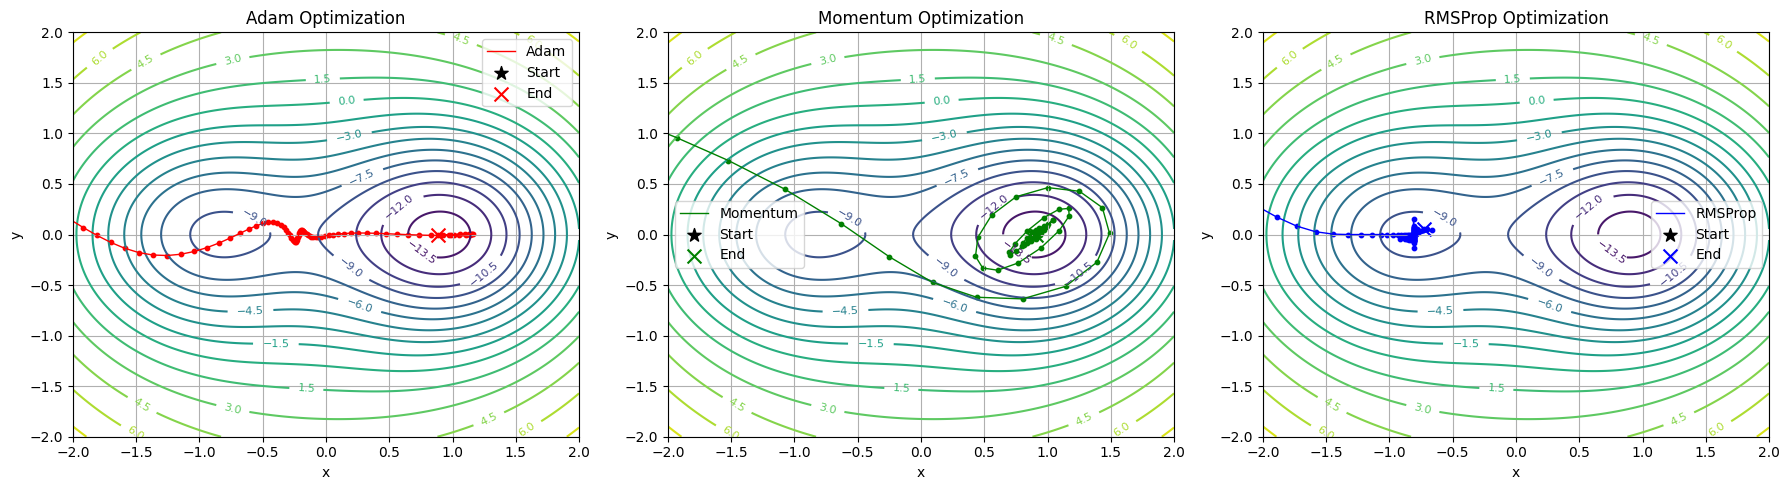

In [37]:
import numpy as np
import matplotlib.pyplot as plt
point = np.array([-1, 0]) 
# Set seed for reproducibility
np.random.seed(42)

# Define the function f(x, y) and its gradients
def f(x, y, a=15, b=10, c=1, d=1):
    return x**2 + y**2 - a * np.exp(-((x-1)**2 + y**2) / c) - b * np.exp(-((x+1)**2 + y**2) / d)

def grad_f(x, y,  a=15, b=10, c=1, d=1):
    df_dx = 2*x + 2*a*(x-1)*np.exp(-((x-1)**2 + y**2) / c) + 2*b*(x+1)*np.exp(-((x+1)**2 + y**2) / d)
    df_dy = 2*y + 2*a*y*np.exp(-((x-1)**2 + y**2) / c) + 2*b*y*np.exp(-((x+1)**2 + y**2) / d)
    return np.array([df_dx, df_dy])

# --- Optimization Algorithms ---

def adam(grad_f, lr=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iters=100, init_point=point):
    x, y = init_point if init_point is not None else np.random.randn(2)
    m = np.zeros(2)
    v = np.zeros(2)
    trajectory = [(x, y)]

    for t in range(1, max_iters + 1):
        grad = grad_f(x, y)
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * (grad ** 2)
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        x -= lr * m_hat[0] / (np.sqrt(v_hat[0]) + epsilon)
        y -= lr * m_hat[1] / (np.sqrt(v_hat[1]) + epsilon)
        trajectory.append((x, y))

    return np.array(trajectory)

def momentum(grad_f, lr=0.1, beta=0.9, max_iters=100, init_point=point):
    x, y = init_point if init_point is not None else np.random.randn(2)
    v = np.zeros(2)
    trajectory = [(x, y)]

    for _ in range(max_iters):
        grad = grad_f(x, y)
        v = beta * v + (1 - beta) * grad
        x -= lr * v[0]
        y -= lr * v[1]
        trajectory.append((x, y))

    return np.array(trajectory)

def rmsprop(grad_f, lr=0.1, beta=0.9, epsilon=1e-8, max_iters=100, init_point=point):
    x, y = init_point if init_point is not None else np.random.randn(2)
    s = np.zeros(2)
    trajectory = [(x, y)]

    for _ in range(max_iters):
        grad = grad_f(x, y)
        s = beta * s + (1 - beta) * (grad ** 2)
        x -= lr * grad[0] / (np.sqrt(s[0]) + epsilon)
        y -= lr * grad[1] / (np.sqrt(s[1]) + epsilon)
        trajectory.append((x, y))

    return np.array(trajectory)

# --- Set a common initial point ---
initial_point = np.array([-4, 2])  # Change as needed
iter_num = 100

# --- Run Optimization ---
trajectory_adam = adam(grad_f, init_point=initial_point, max_iters=iter_num)
trajectory_momentum = momentum(grad_f, init_point=initial_point, max_iters=iter_num)
trajectory_rmsprop = rmsprop(grad_f, init_point=initial_point, max_iters=iter_num)

# --- Plot Contours and Paths ---
x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Function for plotting each trajectory
def plot_trajectory(ax, X, Y, Z, trajectory, title, color, label):
    contour = ax.contour(X, Y, Z, 20, cmap='viridis')
    ax.plot(trajectory[:, 0], trajectory[:, 1], color=color, label=label, linewidth=1)
    ax.scatter(trajectory[:, 0], trajectory[:, 1], color=color, s=10)  # all steps
    ax.scatter(*trajectory[0], color='black', marker='*', s=100, label='Start')  # start
    ax.scatter(*trajectory[-1], color=color, marker='x', s=100, label='End')     # end
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.grid(True)
    ax.clabel(contour, inline=True, fontsize=8)
    ax.legend()

# Plot each optimizer
plot_trajectory(axes[0], X, Y, Z, trajectory_adam, "Adam Optimization", 'red', 'Adam')
plot_trajectory(axes[1], X, Y, Z, trajectory_momentum, "Momentum Optimization", 'green', 'Momentum')
plot_trajectory(axes[2], X, Y, Z, trajectory_rmsprop, "RMSProp Optimization", 'blue', 'RMSProp')

plt.tight_layout()
plt.show()




### Adam vs RMSProp vs. Momentum, adam w globalnym minimum 

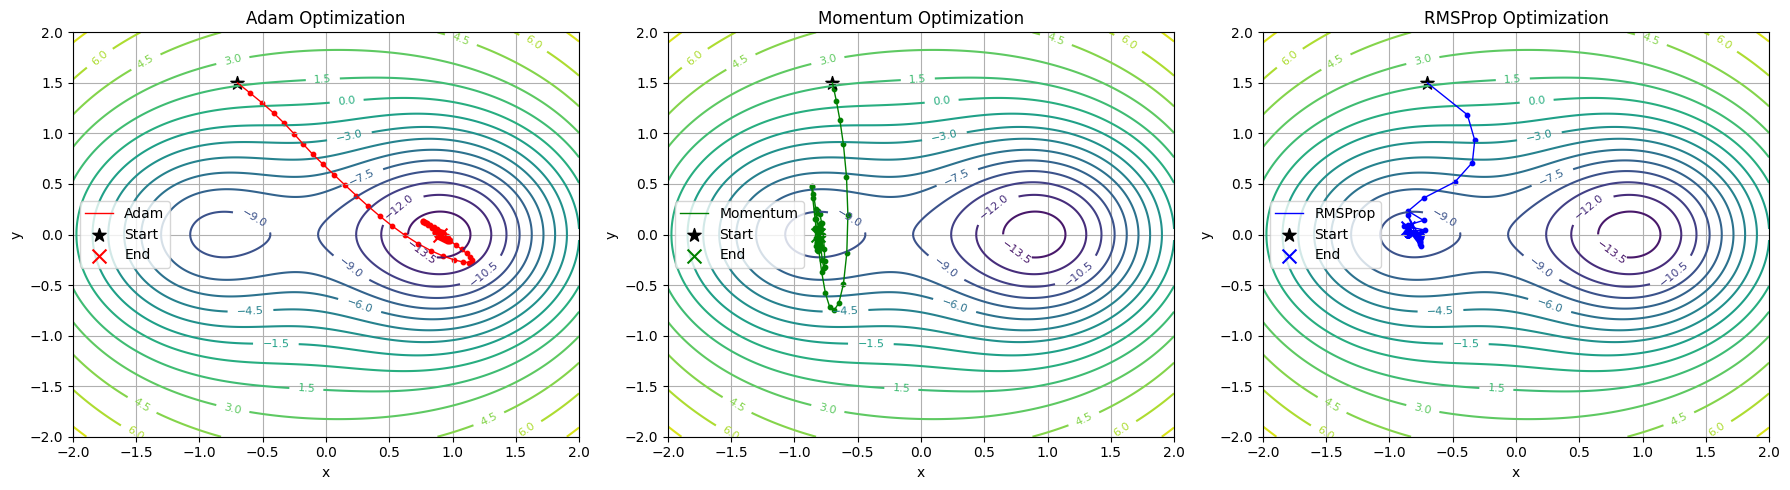

In [38]:
import numpy as np
import matplotlib.pyplot as plt
point = np.array([-1, 0]) 
# Set seed for reproducibility
np.random.seed(42)

# Define the function f(x, y) and its gradients
def f(x, y, a=15, b=10, c=1, d=1):
    return x**2 + y**2 - a * np.exp(-((x-1)**2 + y**2) / c) - b * np.exp(-((x+1)**2 + y**2) / d)

def grad_f(x, y,  a=15, b=10, c=1, d=1):
    df_dx = 2*x + 2*a*(x-1)*np.exp(-((x-1)**2 + y**2) / c) + 2*b*(x+1)*np.exp(-((x+1)**2 + y**2) / d)
    df_dy = 2*y + 2*a*y*np.exp(-((x-1)**2 + y**2) / c) + 2*b*y*np.exp(-((x+1)**2 + y**2) / d)
    return np.array([df_dx, df_dy])

# --- Optimization Algorithms ---

def adam(grad_f, lr=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iters=100, init_point=point):
    x, y = init_point if init_point is not None else np.random.randn(2)
    m = np.zeros(2)
    v = np.zeros(2)
    trajectory = [(x, y)]

    for t in range(1, max_iters + 1):
        grad = grad_f(x, y)
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * (grad ** 2)
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        x -= lr * m_hat[0] / (np.sqrt(v_hat[0]) + epsilon)
        y -= lr * m_hat[1] / (np.sqrt(v_hat[1]) + epsilon)
        trajectory.append((x, y))

    return np.array(trajectory)

def momentum(grad_f, lr=0.1, beta=0.9, max_iters=100, init_point=point):
    x, y = init_point if init_point is not None else np.random.randn(2)
    v = np.zeros(2)
    trajectory = [(x, y)]

    for _ in range(max_iters):
        grad = grad_f(x, y)
        v = beta * v + (1 - beta) * grad
        x -= lr * v[0]
        y -= lr * v[1]
        trajectory.append((x, y))

    return np.array(trajectory)

def rmsprop(grad_f, lr=0.1, beta=0.9, epsilon=1e-8, max_iters=100, init_point=point):
    x, y = init_point if init_point is not None else np.random.randn(2)
    s = np.zeros(2)
    trajectory = [(x, y)]

    for _ in range(max_iters):
        grad = grad_f(x, y)
        s = beta * s + (1 - beta) * (grad ** 2)
        x -= lr * grad[0] / (np.sqrt(s[0]) + epsilon)
        y -= lr * grad[1] / (np.sqrt(s[1]) + epsilon)
        trajectory.append((x, y))

    return np.array(trajectory)

# --- Set a common initial point ---
initial_point = np.array([-0.7, 1.5])  # Change as needed
iter_num = 100

# --- Run Optimization ---
trajectory_adam = adam(grad_f, init_point=initial_point, max_iters=iter_num)
trajectory_momentum = momentum(grad_f, init_point=initial_point, max_iters=iter_num)
trajectory_rmsprop = rmsprop(grad_f, init_point=initial_point, max_iters=iter_num)

# --- Plot Contours and Paths ---
x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Function for plotting each trajectory
def plot_trajectory(ax, X, Y, Z, trajectory, title, color, label):
    contour = ax.contour(X, Y, Z, 20, cmap='viridis')
    ax.plot(trajectory[:, 0], trajectory[:, 1], color=color, label=label, linewidth=1)
    ax.scatter(trajectory[:, 0], trajectory[:, 1], color=color, s=10)  # all steps
    ax.scatter(*trajectory[0], color='black', marker='*', s=100, label='Start')  # start
    ax.scatter(*trajectory[-1], color=color, marker='x', s=100, label='End')     # end
    ax.set_title(title)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.grid(True)
    ax.clabel(contour, inline=True, fontsize=8)
    ax.legend()

# Plot each optimizer
plot_trajectory(axes[0], X, Y, Z, trajectory_adam, "Adam Optimization", 'red', 'Adam')
plot_trajectory(axes[1], X, Y, Z, trajectory_momentum, "Momentum Optimization", 'green', 'Momentum')
plot_trajectory(axes[2], X, Y, Z, trajectory_rmsprop, "RMSProp Optimization", 'blue', 'RMSProp')

plt.tight_layout()
plt.show()


